In [22]:
#simple linear regression
#y = b0 + b1x
#b0 is the intercept
#y = target variable 
#x is the feature
#the coeffients are esrimated using the least square critirion
#the best fit line has to be calculated that minimizes the sum of squared residuals
 

In [23]:
#necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 

In [24]:
dataset = pd.read_csv('/Users/rohithr/Desktop/ml_algorithms/datasets/Salary_Data.csv')


In [25]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [26]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [27]:
dataset.shape

(30, 2)

In [28]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [29]:
x = dataset.drop('Salary',axis = 1)
y = dataset['Salary']

In [30]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(x , y , test_size = 0.2 , random_state = 1000)


In [31]:
xtest.shape , xtrain.shape , ytest.shape , ytrain.shape

((6, 1), (24, 1), (6,), (24,))

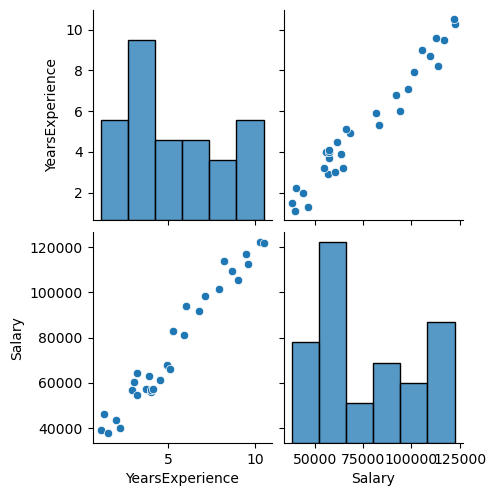

In [32]:
sns.pairplot(dataset)

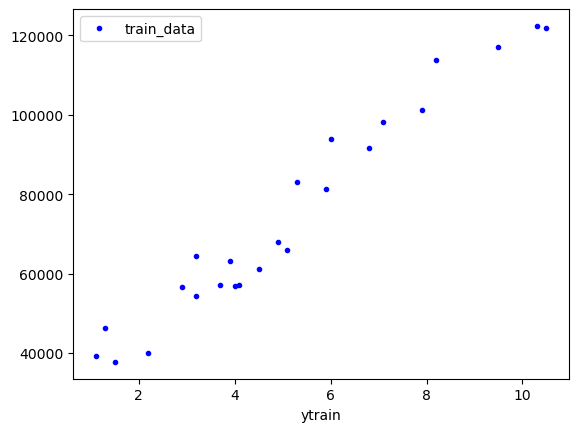

In [33]:
#train data
plt.plot(xtrain,ytrain,'b.',label = 'train_data')
plt.xlabel('xtrain')
plt.xlabel('ytrain')
plt.legend()
plt.show()

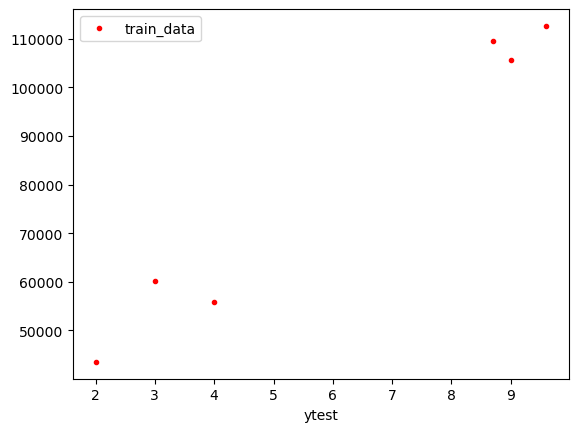

In [34]:
#test data
plt.plot(xtest,ytest,'r.',label = 'train_data')
plt.xlabel('xtest')
plt.xlabel('ytest')
plt.legend()
plt.show()

In [35]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(xtrain,ytrain)

LinearRegression()

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

In [37]:
#convert the standerdised data into pickle format
import pickle
scaling = pickle.dump(scaler,open('scaling.pkl','wb'))


In [38]:
ypred = reg.predict(xtest).round(1)

/Users/rohithr/tensorflow-test/gpu/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [39]:
calculation = pd.DataFrame(np.c_[ytest , ypred] , columns = ['original', 'predicted'])
calculation

,original,predicted
0,109431.0,33452.0
1,105582.0,34380.5
2,43525.0,12715.2
3,112635.0,36237.5
4,55794.0,18905.3
5,60150.0,15810.3


In [40]:
query = reg.predict(np.array([1.2]).reshape(1,-1))
print(query)

[36820.91058616]


/Users/rohithr/tensorflow-test/gpu/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [41]:
print("training accuarcy-->",reg.score(xtrain,ytrain))
print("test accuracy-->",reg.score(xtest,ytest))

training accuarcy--> -2.933962043210583
test accuracy--> -3.2873948526892853


/Users/rohithr/tensorflow-test/gpu/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/rohithr/tensorflow-test/gpu/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


/Users/rohithr/tensorflow-test/gpu/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


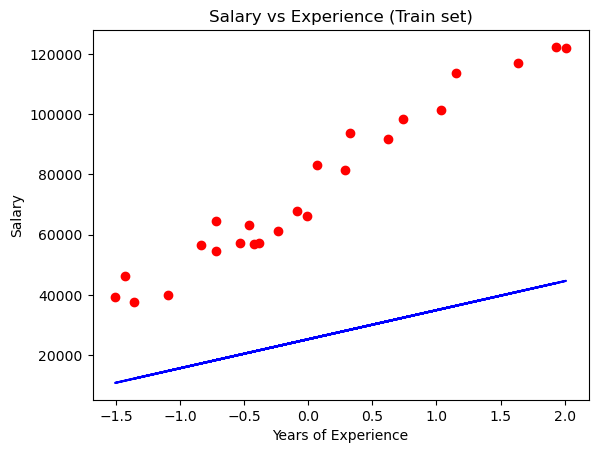

In [42]:
plt.scatter(xtrain, ytrain, color = 'red')
plt.plot(xtrain, reg.predict(xtrain), color = 'blue')
plt.title('Salary vs Experience (Train set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [43]:
import pickle
regmodel = pickle.dump(reg,open("regressor_model.pkl",'wb'))